In [1]:
## Waste classfication using cnn model

In [2]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'c:\Users\jigya\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [4]:
pip install tensorflow

Note: you may need to restart the kernel to use updated packages.Requirement already satisfied: tensorflow in c:\users\jigya\appdata\local\programs\python\python38\lib\site-packages (2.13.0)
  Using cached typing_extensions-4.5.0-py3-none-any.whl (27 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing-extensions 4.12.2
    Uninstalling typing-extensions-4.12.2:
      Successfully uninstalled typing-extensions-4.12.2



ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
pydantic 2.10.5 requires typing-extensions>=4.12.2, but you have typing-extensions 4.5.0 which is incompatible.
pydantic-core 2.27.2 requires typing-extensions!=4.7.0,>=4.6.0, but you have typing-extensions 4.5.0 which is incompatible.
openai 1.59.9 requires typing-extensions<5,>=4.11, but you have typing-extensions 4.5.0 which is incompatible.
You should consider upgrading via the 'c:\Users\jigya\AppData\Local\Programs\Python\Python38\python.exe -m pip install --upgrade pip' command.


In [6]:
# Importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from tqdm import tqdm
import warnings 
warnings.filterwarnings('ignore')

In [7]:
train_path ="dataset/TRAIN"
test_path ="dataset/TEST"

In [8]:
# Importing Libraries 
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Activation,Dropout,Flatten,Dense,BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator,img_to_array,load_img
from glob import glob

In [13]:
#Visualization
from cv2 import cvtColor
x_data = []
y_data = []
for category in glob(train_path+'/*'):
    for file in tqdm(glob(category+'/*')):
        img_array= cv2.imread(file)
        img_array = cv2.cvtColor(img_array,cv2.COLOR_BGR2RGB)
        x_data.append(img_array)
        y_data.append(category.split('/')[-1])
data = pd.DataFrame({'image':x_data,'label':y_data})

100%|██████████| 9999/9999 [02:13<00:00, 74.62it/s] 


In [14]:
data.shape

(22564, 2)

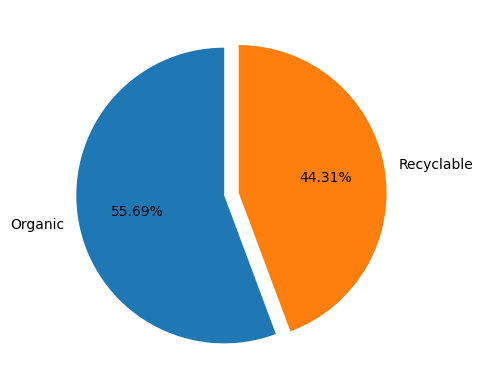

In [16]:
colors = ['#a0d157','#c48bb8']
plt.pie(data.label.value_counts(),labels=['Organic','Recyclable'],autopct='%0.2f%%',startangle =90,explode=[0.05,0.05])
plt.show()

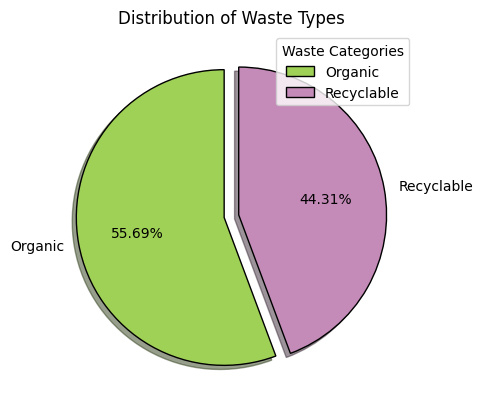

In [17]:
import matplotlib.pyplot as plt

colors = ['#a0d157', '#c48bb8']
explode = [0.05, 0.05]

plt.pie(
    data.label.value_counts(),
    labels=['Organic', 'Recyclable'],
    autopct='%0.2f%%',
    startangle=90,
    explode=explode,
    colors=colors,
    shadow=True,
    wedgeprops={'edgecolor': 'black', 'linewidth': 1}
)
plt.title("Distribution of Waste Types")
plt.legend(loc="upper right", title="Waste Categories")
plt.show()
